# Classification -- Predicting Customer Churn

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Data Understanding

The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

## Research Questions
1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

4. What is the average monthly charges and total charges for customers who churned and those who didn't?

5. What is the churn rate based on the tenure of customers with the company?

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

7. How does the distribution of total charges incurred by customers relate to churn rates?

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

In [ ]:
'''%pip install pandas as pd
%pip install pyodbc  
%pip install python-dotenv 
%pip install openpyxl
'''

In [3]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package

import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import plotly.express as px
color = sns.color_palette()
import matplotlib.colors as mcolors
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.io import write_html

from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

# Load the remote dataset(first dataset)

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")



connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [8]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)

# Load Test dataset.

In [9]:
excel_file = 'Telco-churn-second-2000.xlsx'

# Read the Excel file into a Pandas DataFrame
df_test = pd.read_excel(excel_file, engine='openpyxl')

# Save the DataFrame as a CSV file
df_test.to_csv('df_test.csv', index=False)

# Load Third Dataset

In [10]:
data3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Cleaning First Dataset

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
data.shape

(3000, 21)

In [14]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [16]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [17]:
data.duplicated().sum()

0

In [18]:
data.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [19]:
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [20]:
# Calculate the % of missing values in the dataset
missing_values_percent = data.isna().mean().round(4) * 100
print(missing_values_percent)

customerID           0.00
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        8.99
InternetService      0.00
OnlineSecurity      21.58
OnlineBackup        21.58
DeviceProtection    21.58
TechSupport         21.58
StreamingTV         21.58
StreamingMovies     21.58
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.17
Churn                0.03
dtype: float64


In our analysis, we are using a threshold of 30% for missing values. Columns with missing values above this threshold will be considered for removal.

In this case, no column has more than 30% missing data, so all columns are retained. For those columns with missing data below this threshold, we will perform imputation to fill in the missing values.

In [21]:
# Fill Null with mode in categorical dataset
columns_to_fill = ['MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0], inplace=True)

To ensure that our data is correctly processed by our model, we need to make sure that each feature is of the correct data type. 

In [22]:
#change the dtype for SeniorCitizen column to be same as other datasets
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

In [23]:
# change dtype from bool to object in categorical columns
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Convert bool to str in df2
for col in cols:
    data[col] = data[col].astype(str)

# Consistent representation
for col in cols:
    data[col] = data[col].map({'True': 'Yes', 'False': 'No'})

## Check for outliers in the TotalCharges  column

In [24]:
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['TotalCharges'] < lower_bound) | (data['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')


There are 0 outliers in TotalCharges.


There are no outliers. The mean can be used to impute missing values in the TotalCharges Column

In [25]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data.TotalCharges = imputer.fit_transform(data["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [26]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [27]:
data['tenure_group'].value_counts()

tenure_group
1 - 12     919
61 - 72    614
13 - 24    430
25 - 36    364
49 - 60    340
37 - 48    321
Name: count, dtype: int64

Remove column not needed

In [28]:
#drop column customerID
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [35]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [34]:
data = data.dropna(subset=['tenure_group'])

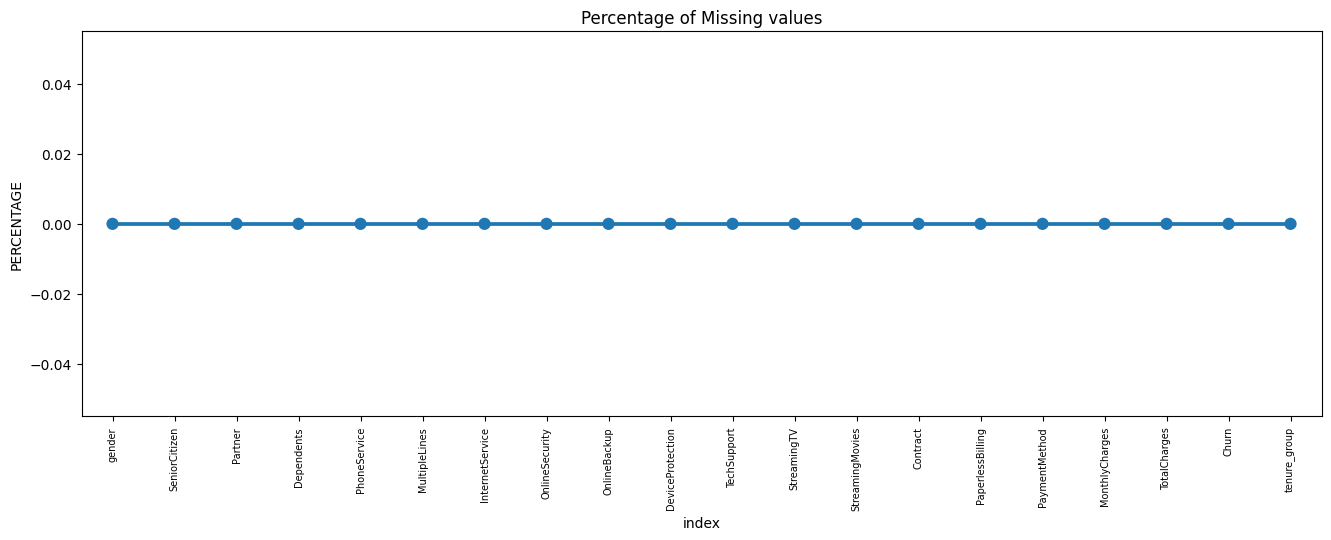

In [36]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [37]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1 - 12
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1 - 12


# Cleaning Test Dataset

In [38]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [39]:
df_test.shape

(2000, 20)

In [40]:
df_test.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [42]:
df_test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


In [43]:
df_test.duplicated().sum()

0

In [45]:
df_test.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], inplace=True)

In [46]:
df_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Convert TotalCharges to numeric datatype

In [47]:
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'],errors = 'coerce')

In [48]:
df_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

## Check for outliers in the TotalCharges  column

In [49]:
Q1 = df_test['TotalCharges'].quantile(0.25)
Q3 = df_test['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_test[(df_test['TotalCharges'] < lower_bound) | (df_test['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 2 outliers in TotalCharges.


In [50]:
# Calculate the median of the column without the outliers
median = df_test.loc[(df_test['TotalCharges'] >= lower_bound) & (df_test['TotalCharges'] <= upper_bound), 'TotalCharges'].median()

# Replace the outliers with the median
df_test.loc[(df_test['TotalCharges'] < lower_bound) | (df_test['TotalCharges'] > upper_bound), 'TotalCharges'] = median

There are only 2 outliers. Outliers are handled by replacing them with the median of the non-outlier values. This helps to prevent the skewing of the data that can be caused by extreme outlier values.The mean can be used to impute missing values in the TotalCharges Column

In [51]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df_test.TotalCharges = imputer.fit_transform(df_test["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [52]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_test['tenure_group'] = pd.cut(df_test.tenure, range(1, 80, 12), right=False, labels=labels)

In [53]:
df_test['tenure_group'].value_counts()

tenure_group
1 - 12     638
61 - 72    390
13 - 24    292
49 - 60    242
25 - 36    229
37 - 48    203
Name: count, dtype: int64

Remove column not needed

In [54]:
#drop column customerID 
df_test.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [55]:
df_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_group        3
dtype: int64

In [56]:
df_test = df_test.dropna(subset=['tenure_group'])

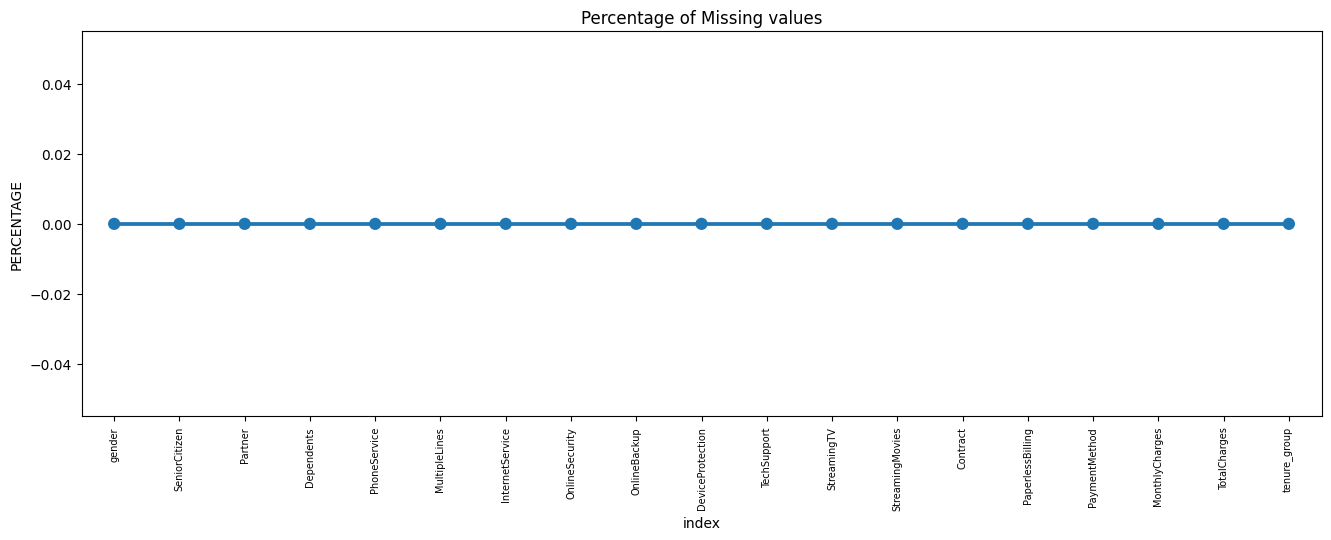

In [57]:
missing = pd.DataFrame((df_test.isnull().sum())*100/df_test.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [58]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,1 - 12
1,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,1 - 12
2,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,25 - 36
3,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,25 - 36
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,1 - 12


# Cleaning Third Dataset

In [59]:
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [60]:
data3.shape

(2043, 21)

In [61]:
data3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [63]:
data3.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [64]:
data3.duplicated().sum()

0

In [65]:
data3.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [66]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Convert TotalCharges to numeric datatype

In [67]:
data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'],errors = 'coerce')

In [68]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

## Check for outliers in the TotalCharges  column

In [69]:
Q1 = data3['TotalCharges'].quantile(0.25)
Q3 = data3['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data3[(data3['TotalCharges'] < lower_bound) | (data3['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 0 outliers in TotalCharges.


There are no outliers. The mean can be used to impute missing values in the TotalCharges Column

In [70]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data3.TotalCharges = imputer.fit_transform(data3["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [71]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data3['tenure_group'] = pd.cut(data3.tenure, range(1, 80, 12), right=False, labels=labels)

In [72]:
data3['tenure_group'].value_counts()

tenure_group
1 - 12     605
61 - 72    403
13 - 24    302
49 - 60    250
25 - 36    239
37 - 48    238
Name: count, dtype: int64

Remove columns not needed

In [73]:
#drop column customerID
data3.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [74]:
data3.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

In [75]:
data3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        3
dtype: int64

In [76]:
data3 = data3.dropna(subset=['tenure_group'])

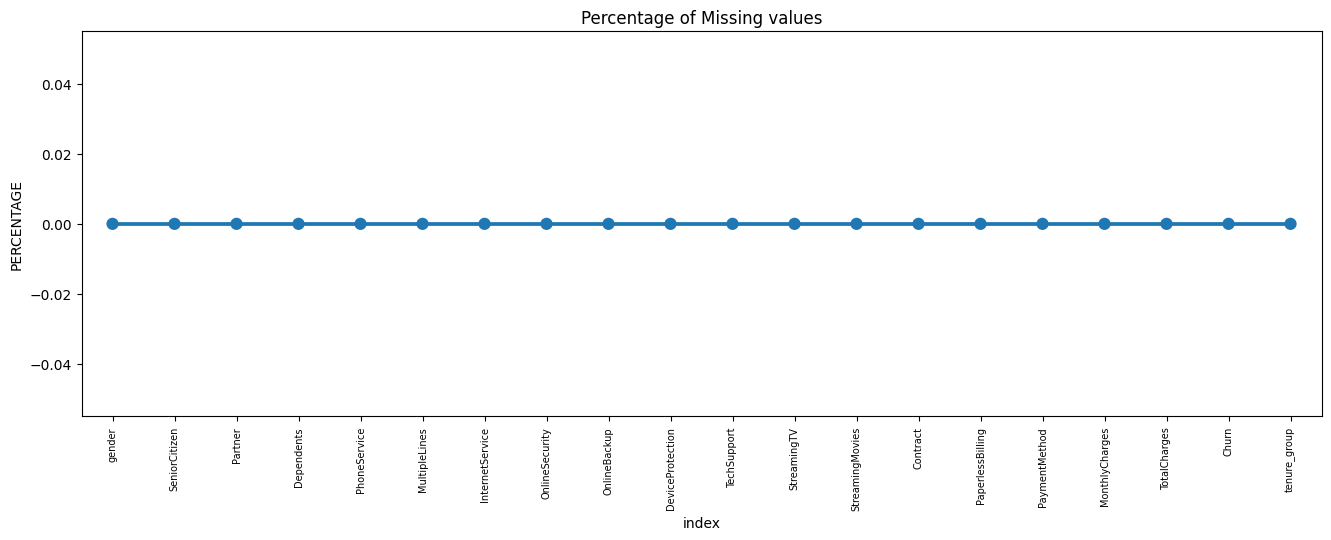

In [77]:
missing = pd.DataFrame((data3.isnull().sum())*100/data3.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [78]:
data3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes,13 - 24
2,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No,61 - 72
3,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes,1 - 12
4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No,61 - 72


## After Cleaning Concatenate First Dataset and Third Dataset. Do not include the Test Dataset

In [79]:
# Concatenate the data frames
df = pd.concat([data, data3])

In [80]:
# Reseting the index of the concatenated data frame
df.to_csv('df.csv', index=False)

## Concatenated Dataset

In [81]:
df= pd.read_csv('df.csv')

In [82]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1 - 12
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1 - 12


In [83]:
df.shape

(5025, 20)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5025 non-null   object 
 1   SeniorCitizen     5025 non-null   int64  
 2   Partner           5025 non-null   object 
 3   Dependents        5025 non-null   object 
 4   PhoneService      5025 non-null   object 
 5   MultipleLines     5025 non-null   object 
 6   InternetService   5025 non-null   object 
 7   OnlineSecurity    5025 non-null   object 
 8   OnlineBackup      5025 non-null   object 
 9   DeviceProtection  5025 non-null   object 
 10  TechSupport       5025 non-null   object 
 11  StreamingTV       5025 non-null   object 
 12  StreamingMovies   5025 non-null   object 
 13  Contract          5025 non-null   object 
 14  PaperlessBilling  5025 non-null   object 
 15  PaymentMethod     5025 non-null   object 
 16  MonthlyCharges    5025 non-null   float64


In [85]:
df.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,5025.000000,5025.000000,5025.000000
mean,0.162985,65.170975,2306.569374
std,0.369389,30.059711,2269.488745
min,0.000000,18.400000,18.799999
25%,0.000000,35.900002,419.700012
50%,0.000000,70.650000,1406.650024
75%,0.000000,90.050003,3865.600098
max,1.000000,118.650002,8670.100000


## Profile Report for Trainset

In [133]:
'''
profile = ProfileReport(df, title='Train Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Trainset] Pandas-Profiling_Report.html")
'''

'\nprofile = ProfileReport(df, title=\'Train Dataset\', html={\'style\':{\'full_width\':True}})\nprofile.to_notebook_iframe()\nprofile.to_file("[Trainset] Pandas-Profiling_Report.html")\n'

## Profile Report for Testset

In [ ]:
'''
profile = ProfileReport(df_test, title='Test Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Testset] Pandas-Profiling_Report.html")
'''

# Data Exploration

1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?
2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?
3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?
4. What is the average monthly charges and total charges for customers who churned and those who didn't?
5. What is the churn rate based on the tenure of customers with the company?
6. What is the distribution of monthly charges for customers who churned versus those who did not churn?
7. How does the distribution of total charges incurred by customers relate to churn rates?
8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?
9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

## Univariate Analysis
Univariate Analysis - analysis of a single variable

1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

In [87]:
# Calculate the number of customers who churned and didn't churn
churn_counts= df['Churn'].value_counts()
churn_counts

Churn
No     3694
Yes    1331
Name: count, dtype: int64

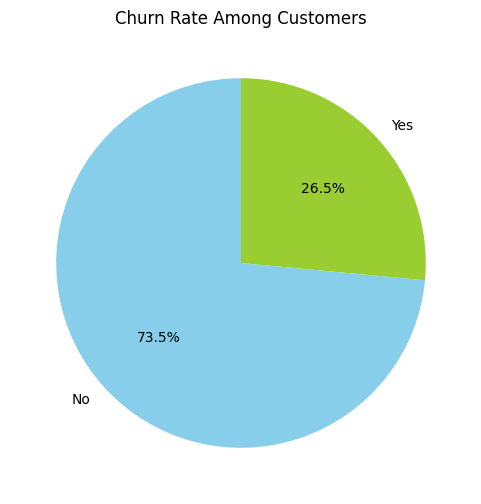

In [88]:
# Pie Chart to visualize churn rate
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = churn_counts.index, startangle=90, autopct='%1.1f%%', colors=['skyblue', 'yellowgreen'])
plt.title('Churn Rate Among Customers')
plt.show()

The dataset is highly imbalanced. The ratio of the two classes is 73:27. When dealing with imbalanced datasets, it's important to apply appropriate techniques during the model training phase, such as resampling, use of appropriate evaluation metrics, or implementation of anomaly detection techniques. 

To gain insights from our data, we should perform separate analyses for each of our target classes. This means considering our target values separately and observing how other features behave in each case. 

Let's delve into exploratory data analysis, investigating relationships between the target variable and other features, as well as relationships amongst the independent variables themselves. This will provide a clearer view on how the features contribute to the target variable, and might shed some light on why such imbalance is present in our target variable.

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

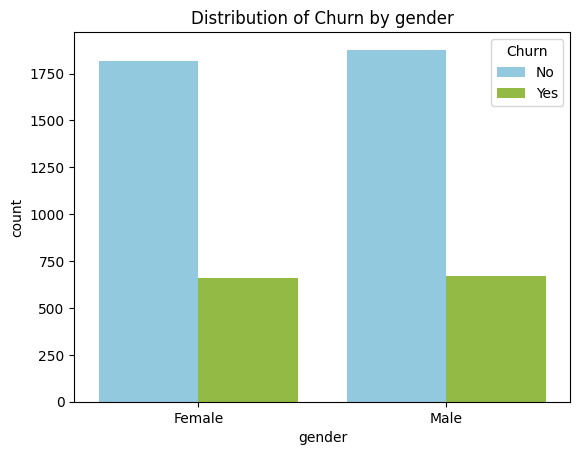

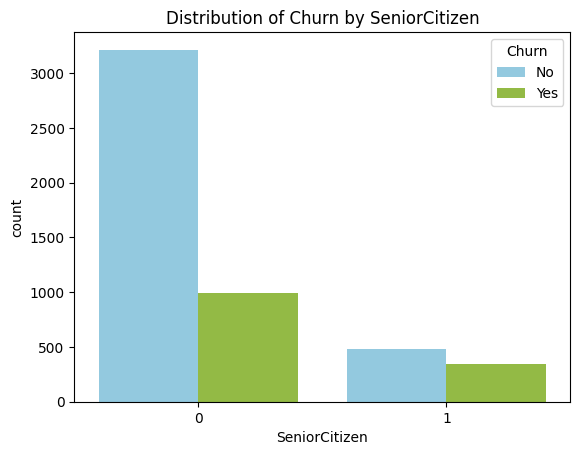

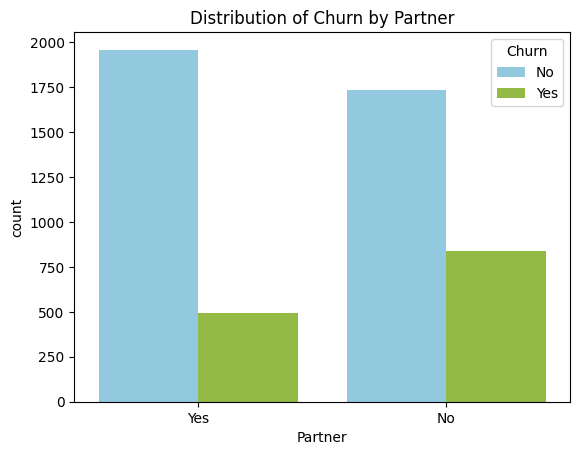

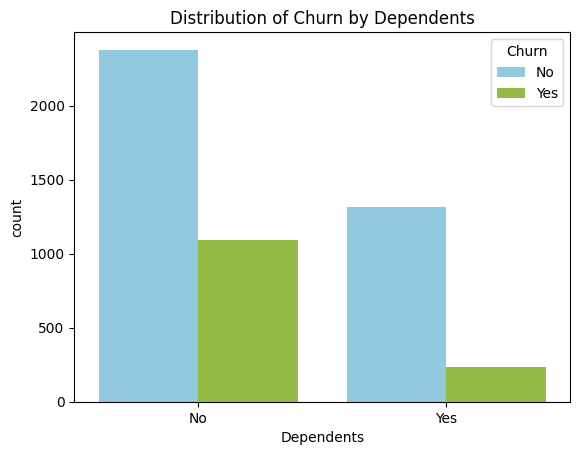

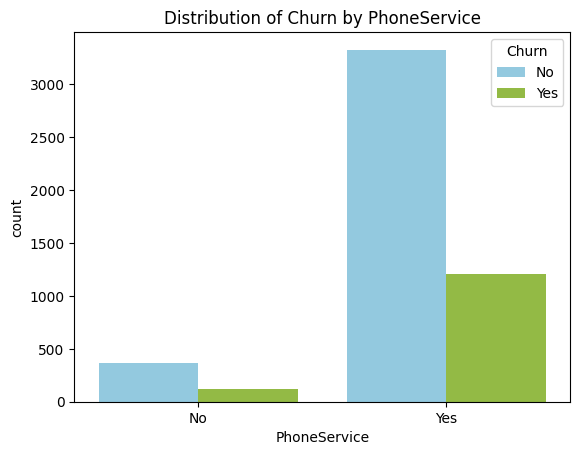

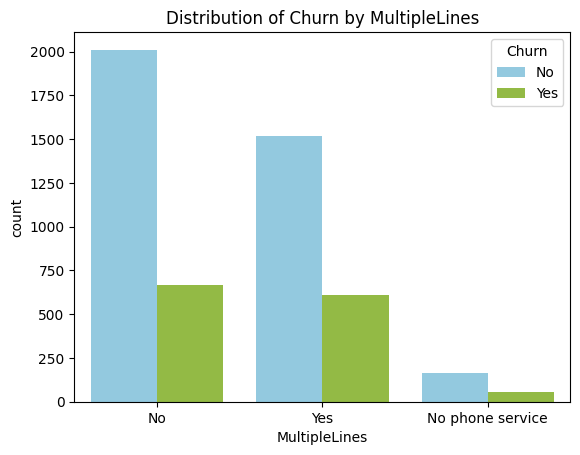

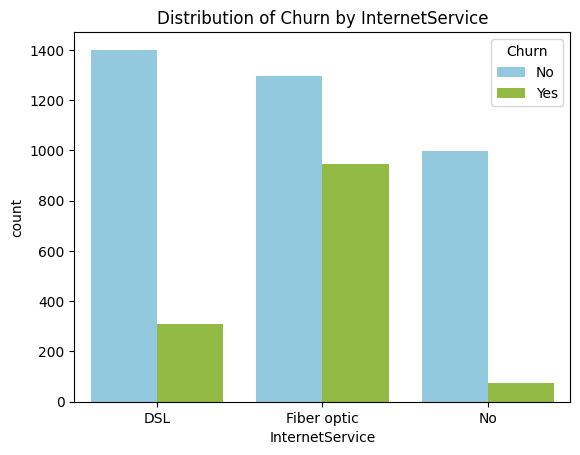

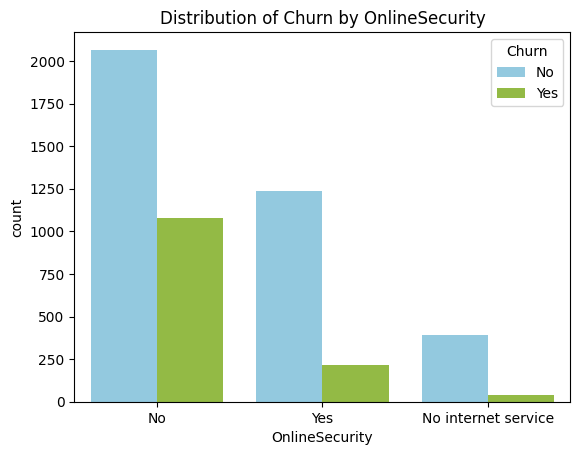

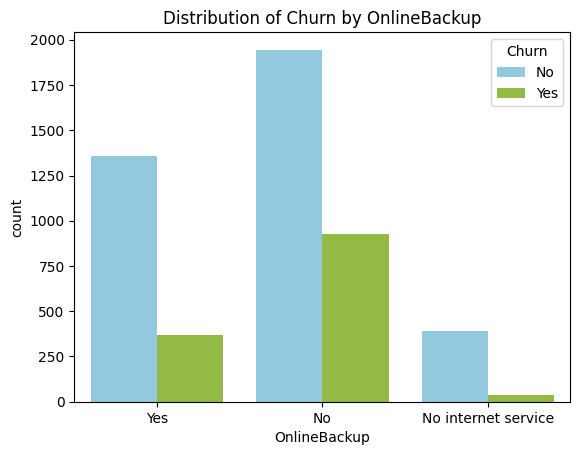

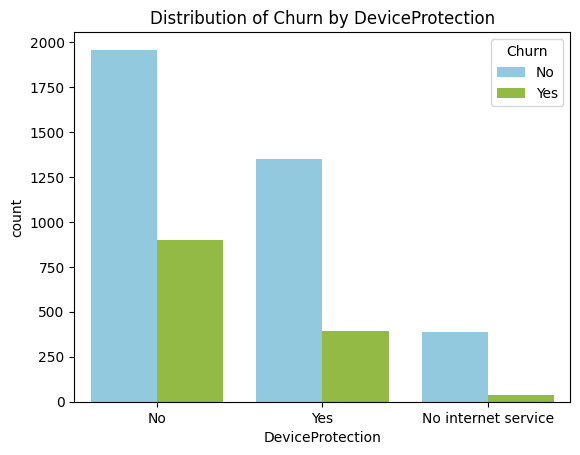

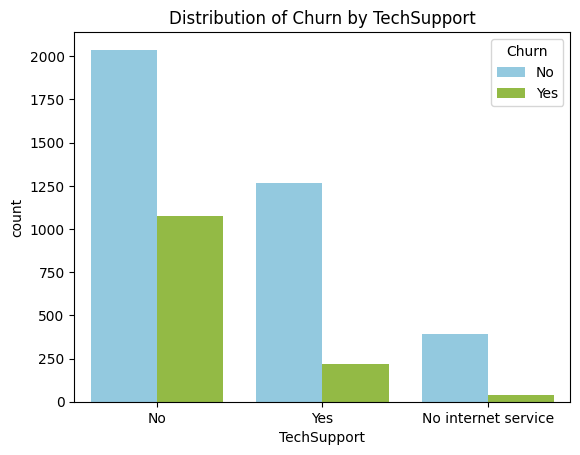

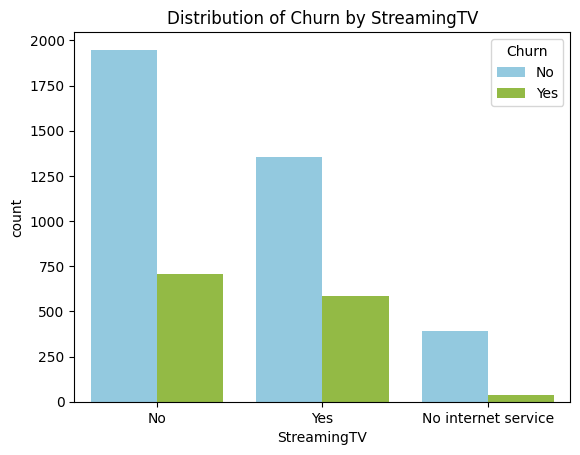

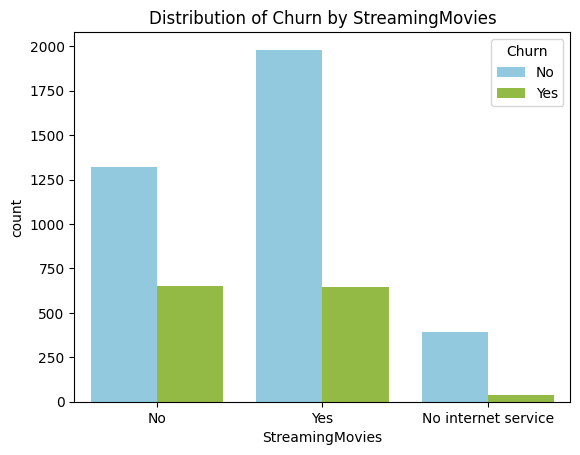

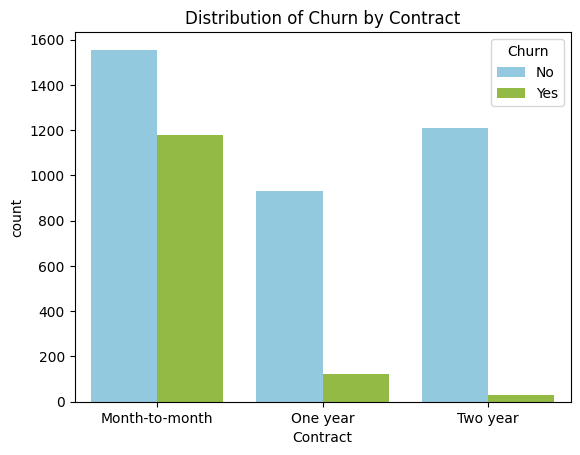

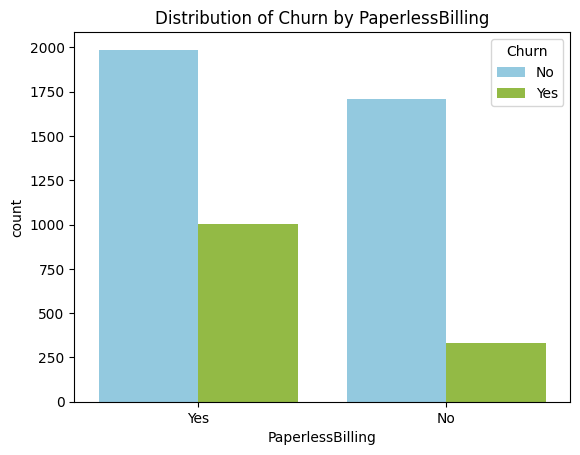

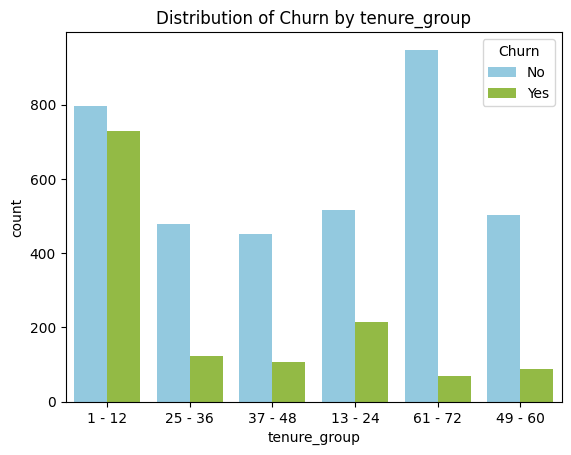

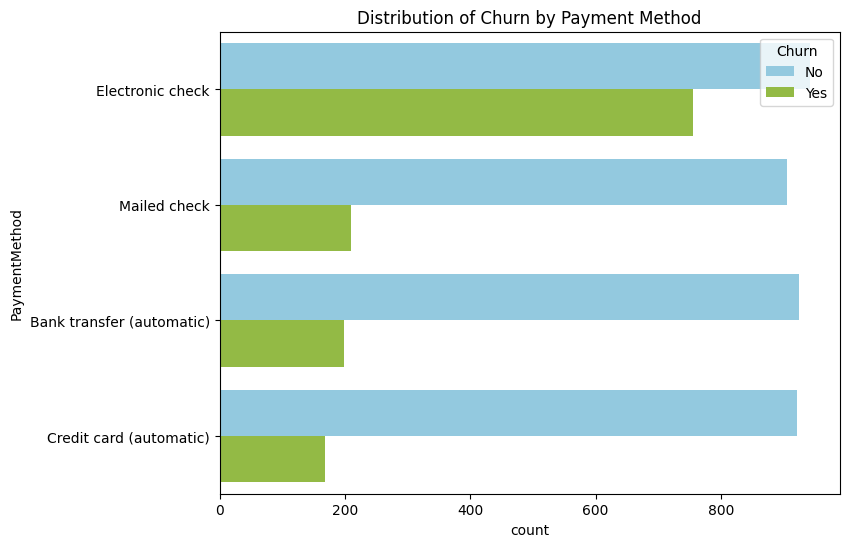

In [89]:
for i, predictor in enumerate(df.drop(columns=['Churn','PaymentMethod', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn', palette=['skyblue', 'yellowgreen'])
    plt.title(f'Distribution of Churn by {predictor}')
    plt.show()

# Separate plot for 'PaymentMethod'
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette=['skyblue', 'yellowgreen'])
plt.title('Distribution of Churn by Payment Method')
plt.show()

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

In [ ]:
# Create subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# box plot for 'MonthlyCharges'
fig.add_trace(
    go.Box(y=df['MonthlyCharges'], name='MonthlyCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=1)

# box plot for 'TotalCharges'
fig.add_trace(
    go.Box(y=df['TotalCharges'], name='TotalCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=2)

# Update layout
fig.update_layout(height=400, width=1200, title_text="Descriptive Statistics of Monthly Charges and Total Charges")
fig.show()

# Save figure to HTML file
write_html(fig, 'Descriptive_Statistics_Boxplots.html')

## **Bivariate Analysis** (analysis involving two variables)

4. What is the average monthly charges and total charges for customers who churned and those who didn't according to tenure group?

In [114]:
# Calculate the average MonthlyCharges and TotalCharges for customers who churned and those who didn't
avg_charges = df.groupby(['Churn'])[['MonthlyCharges', 'TotalCharges']].mean()

print(avg_charges)

       MonthlyCharges  TotalCharges
Churn                              
No          61.526083   2571.172700
Yes         75.286852   1572.200714


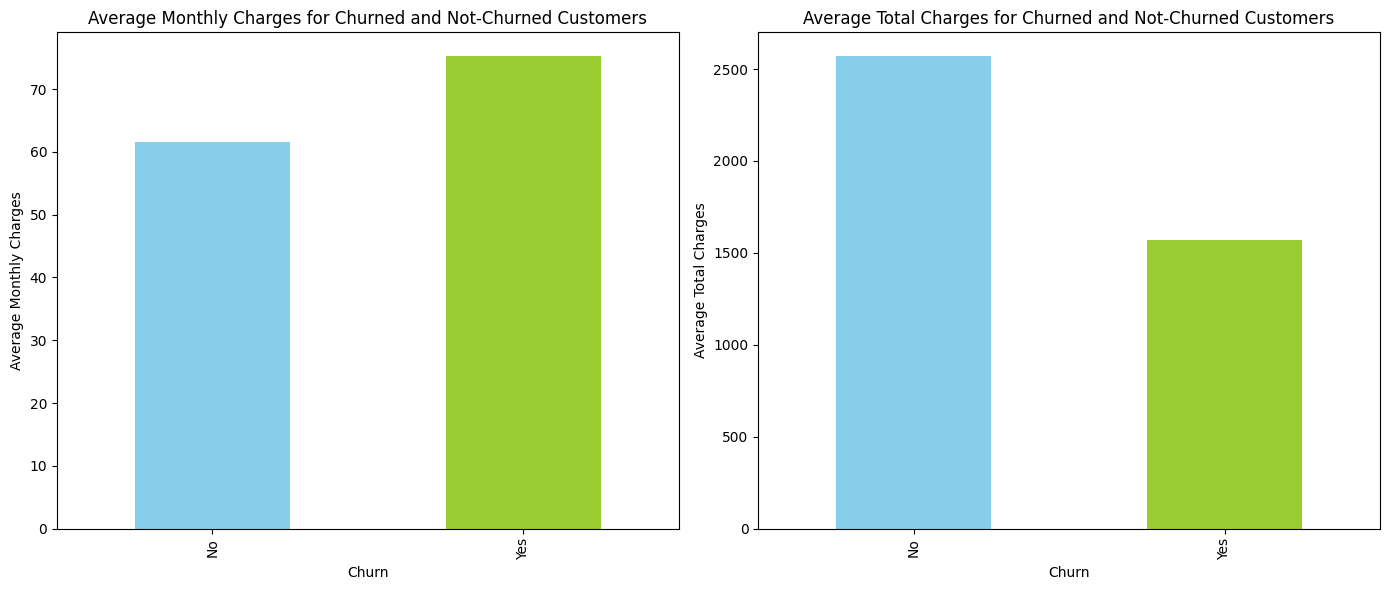

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the average MonthlyCharges
avg_charges['MonthlyCharges'].plot(kind='bar', color=['skyblue', 'yellowgreen'], ax=axes[0])
axes[0].set_ylabel('Average Monthly Charges')
axes[0].set_title('Average Monthly Charges for Churned and Not-Churned Customers')

# Plot the average TotalCharges
avg_charges['TotalCharges'].plot(kind='bar', color=['skyblue', 'yellowgreen'], ax=axes[1])
axes[1].set_ylabel('Average Total Charges')
axes[1].set_title('Average Total Charges for Churned and Not-Churned Customers')

plt.tight_layout()
plt.show()

This suggests that customers who churn tend to be those with higher monthly charges but lower total charges, possibly indicating that these customers tend to leave the company relatively earlier in their tenure. This is a valuable insight for the company, as it might need to review its pricing strategy, particularly for new customers or customers in the early stages of their tenure.

5. What is the churn rate based on the tenure of customers with the company?

In [101]:
# First, you need to group your data by tenure and Churn columns
grouped = df.groupby(['tenure_group', 'Churn']).size().unstack(fill_value=0)
# Calculate churn rate for each tenure group
grouped['Churn Rate'] =( grouped['Yes'] / (grouped['Yes'] + grouped['No']))*100

print(grouped['Churn Rate'])

tenure_group
1 - 12     47.769029
13 - 24    29.371585
25 - 36    20.563847
37 - 48    19.320215
49 - 60    14.745763
61 - 72     6.784661
Name: Churn Rate, dtype: float64


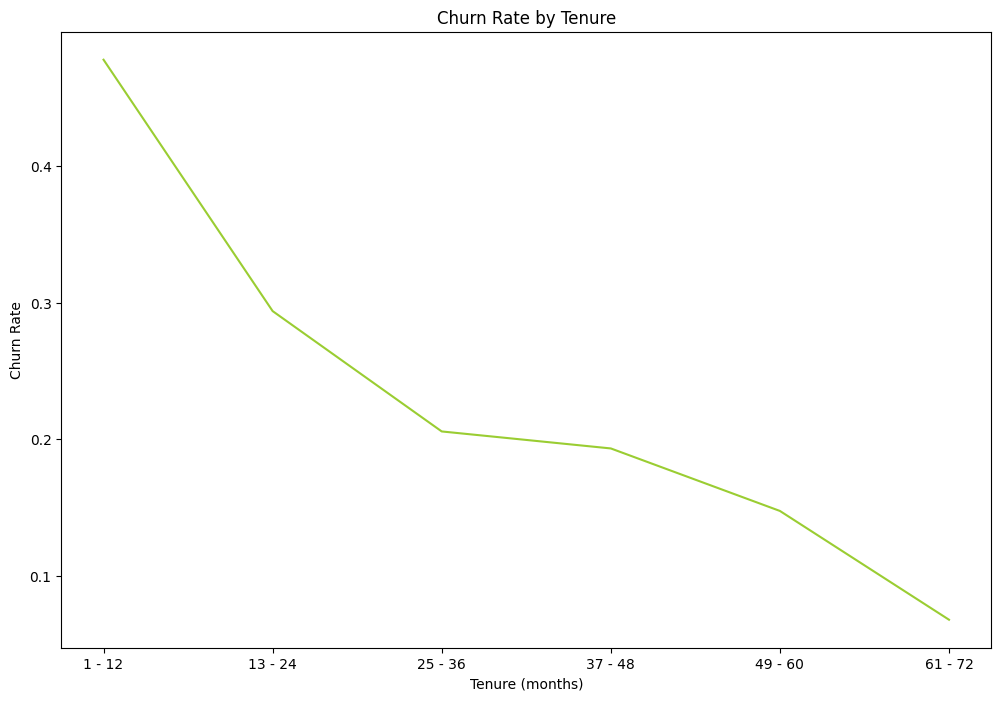

In [98]:
# Plot the churn rate against tenure
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='tenure_group', y='Churn Rate', color= 'yellowgreen')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate %')
plt.show()

The churn rate is calculated as the percentage of customers that have churned in each group. From the data, we can observe that the churn rate decreases as the tenure increases. For example, the churn rate for customers who stayed between 1 to 12 months is about 48%, while it's about 7% for customers who stayed between 61 to 72 months. This suggests that newer customers are more likely to churn compared to long-time customers.

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

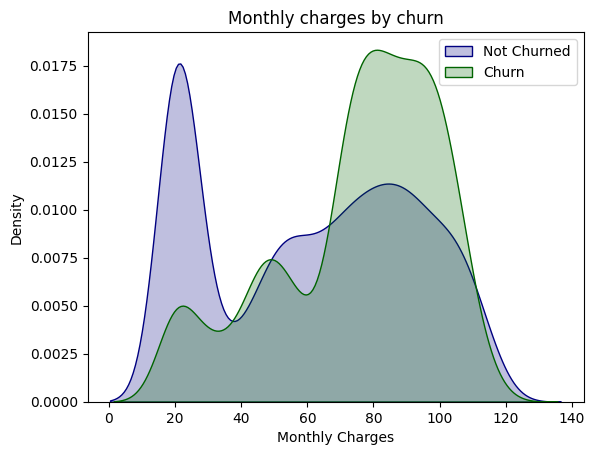

In [104]:
monthly_charges = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No") ],
                color="navy", fill = True)
monthly_charges = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes") ],
                ax =monthly_charges, color="darkgreen", fill = True)
monthly_charges.legend(["Not Churned","Churn"],loc='upper right')
monthly_charges.set_ylabel('Density')
monthly_charges.set_xlabel('Monthly Charges')
monthly_charges.set_title('Monthly charges by churn');

Churn is high when Monthly Charges are high

7. How does the distribution of total charges incurred by customers relate to churn rates?

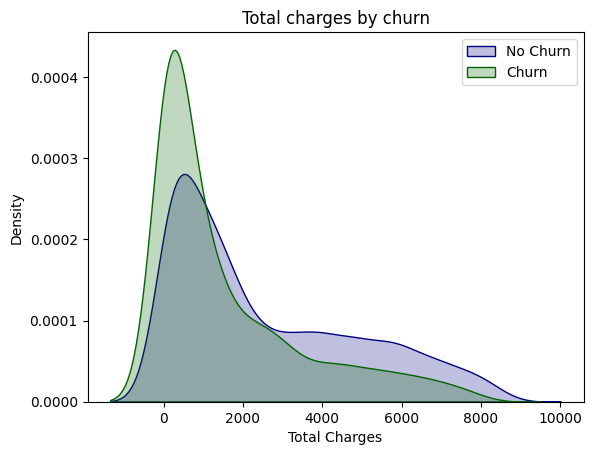

In [106]:
total_charges = sns.kdeplot(df.TotalCharges[(df["Churn"] == "No") ],
                color="navy", fill = True)
total_charges = sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes") ],
                ax =total_charges, color="darkgreen", fill= True)
total_charges.legend(["No Churn","Churn"],loc='upper right')
total_charges.set_ylabel('Density')
total_charges.set_xlabel('Total Charges')
total_charges.set_title('Total charges by churn');

Higher Churn at lower Total Charges. 

## **Multivariate Analysis** (analysis involving more than two variables):

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

Convert target value to binary value, yes=1, no=0

In [129]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

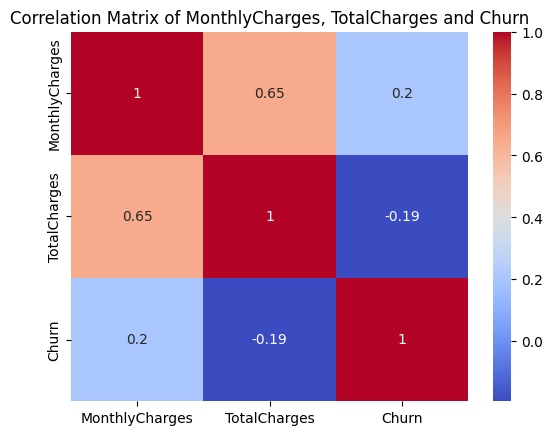

In [130]:
# Select columns
columns = ['MonthlyCharges', 'TotalCharges', 'Churn']
# Calculate correlation matrix
corr_matrix = df[columns].corr()
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of MonthlyCharges, TotalCharges and Churn')
plt.show()


9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

Convert all the categorical variables into dummy variables

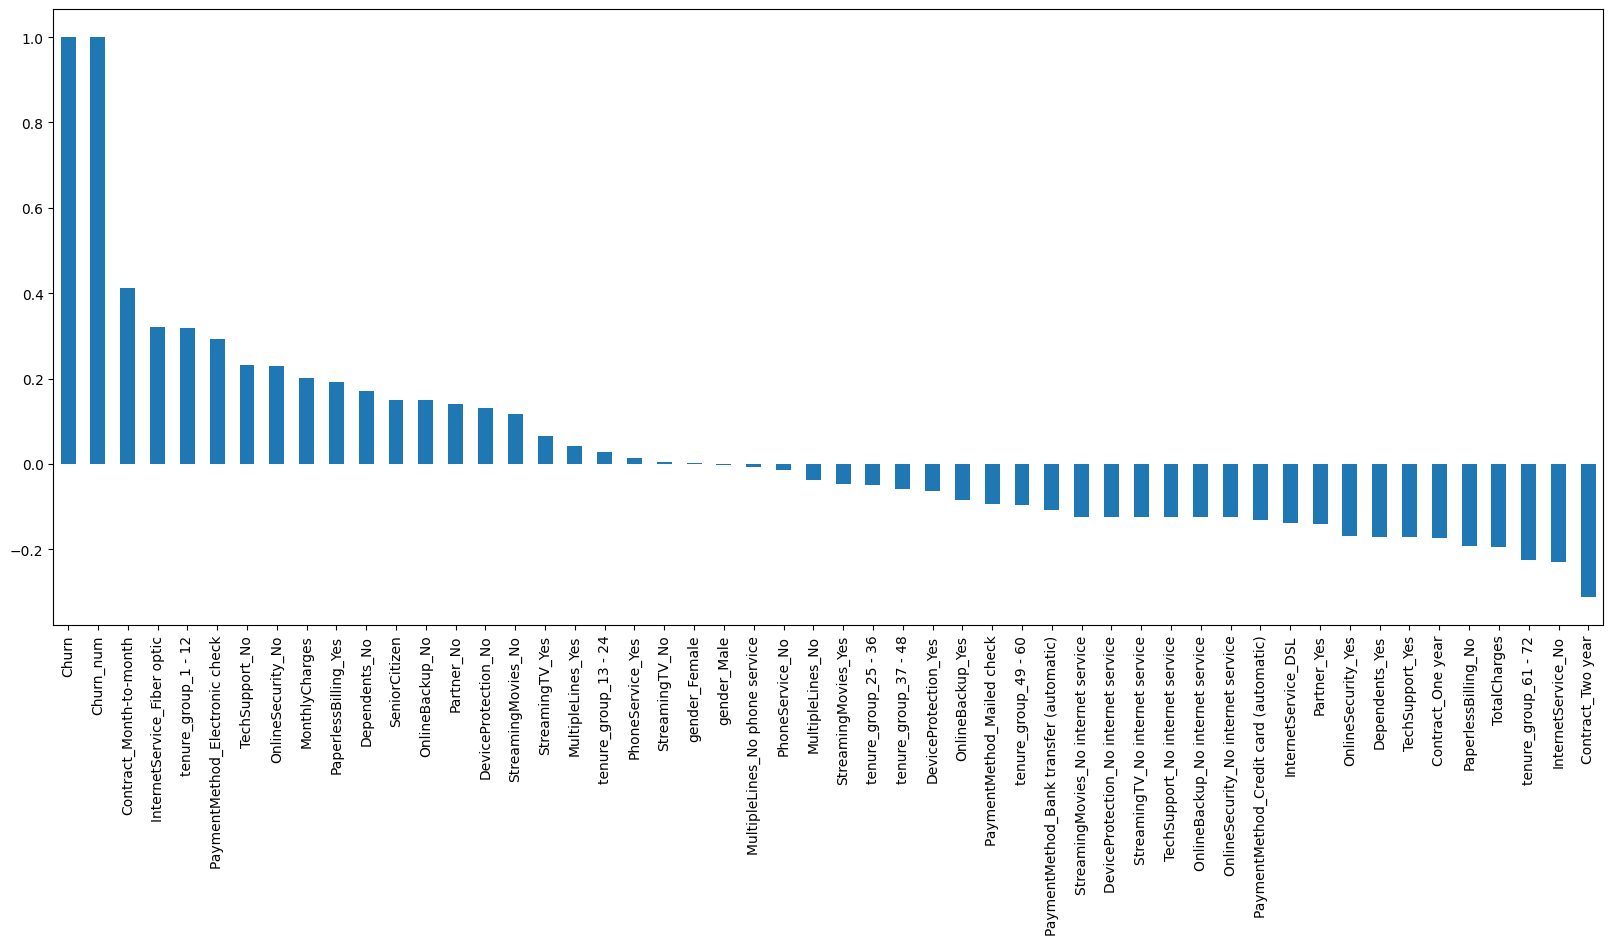

In [132]:
df_dm = pd.get_dummies(df)
plt.figure(figsize=(20,8))
df_dm.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');